In [2]:
#final data extractor from all outs

def extract_model_data(file_path):
    training_loss, training_accuracy, validation_loss, validation_accuracy = [], [], [], []

    with open(file_path, 'r') as file:
        for line in file:
            if "Average" in line:
                parts = line.split(' ')
                epoch = int(parts[1].split('/')[0])
                train_loss = float(parts[5])
                train_acc = float(parts[8])
                val_loss = float(parts[11])
                val_acc = float(parts[15].strip().replace('\\', '').replace('}',''))

                training_loss.append((epoch, train_loss))
                training_accuracy.append((epoch, train_acc))
                validation_loss.append((epoch, val_loss))
                validation_accuracy.append((epoch, val_acc))

    return {
        "training_loss": training_loss,
        "training_accuracy": training_accuracy,
        "validation_loss": validation_loss,
        "validation_accuracy": validation_accuracy
    }

# Dictionary of model names and file names
model_files = {
    'VGG19_standard': 'vgg_base.txt',
    'AlexNet_standard': 'alex_base.txt',
    'ResNet18_standard': 'res_base.txt',
    'VGG19_mtcnn': 'vgg_mtcnn.txt',
    'AlexNet_mtcnn': 'alex_mtcnn.txt',
    'ResNet18_mtcnn': 'res_mtcnn.txt',
    'VGG19_gaussian': 'vgg_gauss.txt',
    'AlexNet_gaussian': 'alex_gauss.txt',
    'ResNet18_gaussian': 'res_gauss.txt',
    'VGG19_combo': 'vgg_GR.txt',
    'AlexNet_combo': 'alex_GR.txt',
    'ResNet18_combo': 'res_GR.txt',
    'Custom': 'custom.txt'
}

# Initialize dictionary to store extracted data for each model
graph_data = {}

# Loop through each model and extract data
for model, file in model_files.items():
    graph_data[model] = extract_model_data(file)

# Print data for each model
for model, data in graph_data.items():
    print(f"Data for {model}:")
    print("Training Loss:", data["training_loss"])
    print("Training Accuracy:", data["training_accuracy"])
    print("Validation Loss:", data["validation_loss"])
    print("Validation Accuracy:", data["validation_accuracy"])
    print("\n")  # Adds a newline for better readability
# Write model data to a file
with open('model_data_output.txt', 'w') as output_file:
    for model, data in graph_data.items():
        output_file.write(f"Data for {model}:\n")
        output_file.write("Training Loss: " + str(data["training_loss"]) + "\n")
        output_file.write("Training Accuracy: " + str(data["training_accuracy"]) + "\n")
        output_file.write("Validation Loss: " + str(data["validation_loss"]) + "\n")
        output_file.write("Validation Accuracy: " + str(data["validation_accuracy"]) + "\n\n")


Data for VGG19_standard:
Training Loss: [(1, 0.016685190592557193), (2, 0.009484355758428573), (3, 0.005349946289788932), (4, 0.003308077184436843), (5, 0.002195691852098098), (6, 0.0015306308224538225), (7, 0.0011625640457820555), (8, 0.0009392538236168184), (9, 0.0007624772771381685), (10, 0.0006293438496937597), (11, 0.000581716343416847), (12, 0.0004841451701310325), (13, 0.0004294881924507217), (14, 0.00037279985031649174), (15, 0.00034124833143660456), (16, 0.0002944301255637447), (17, 0.00027778607344452555), (18, 0.0002637314053520231), (19, 0.00023424777975080018), (20, 0.00021331734682193202), (21, 0.0002066877601897906), (22, 0.0001888699330438925), (23, 0.00015943205462915416), (24, 0.0001586101373846384), (25, 0.000131414723044265), (26, 0.0001296459373434402), (27, 0.00011640677212939629), (28, 0.00011966323046179128), (29, 0.00010691784853146487), (30, 0.00011208436337148314)]
Training Accuracy: [(1, 0.7209500074386597), (2, 0.8723599910736084), (3, 0.9322399497032166), 

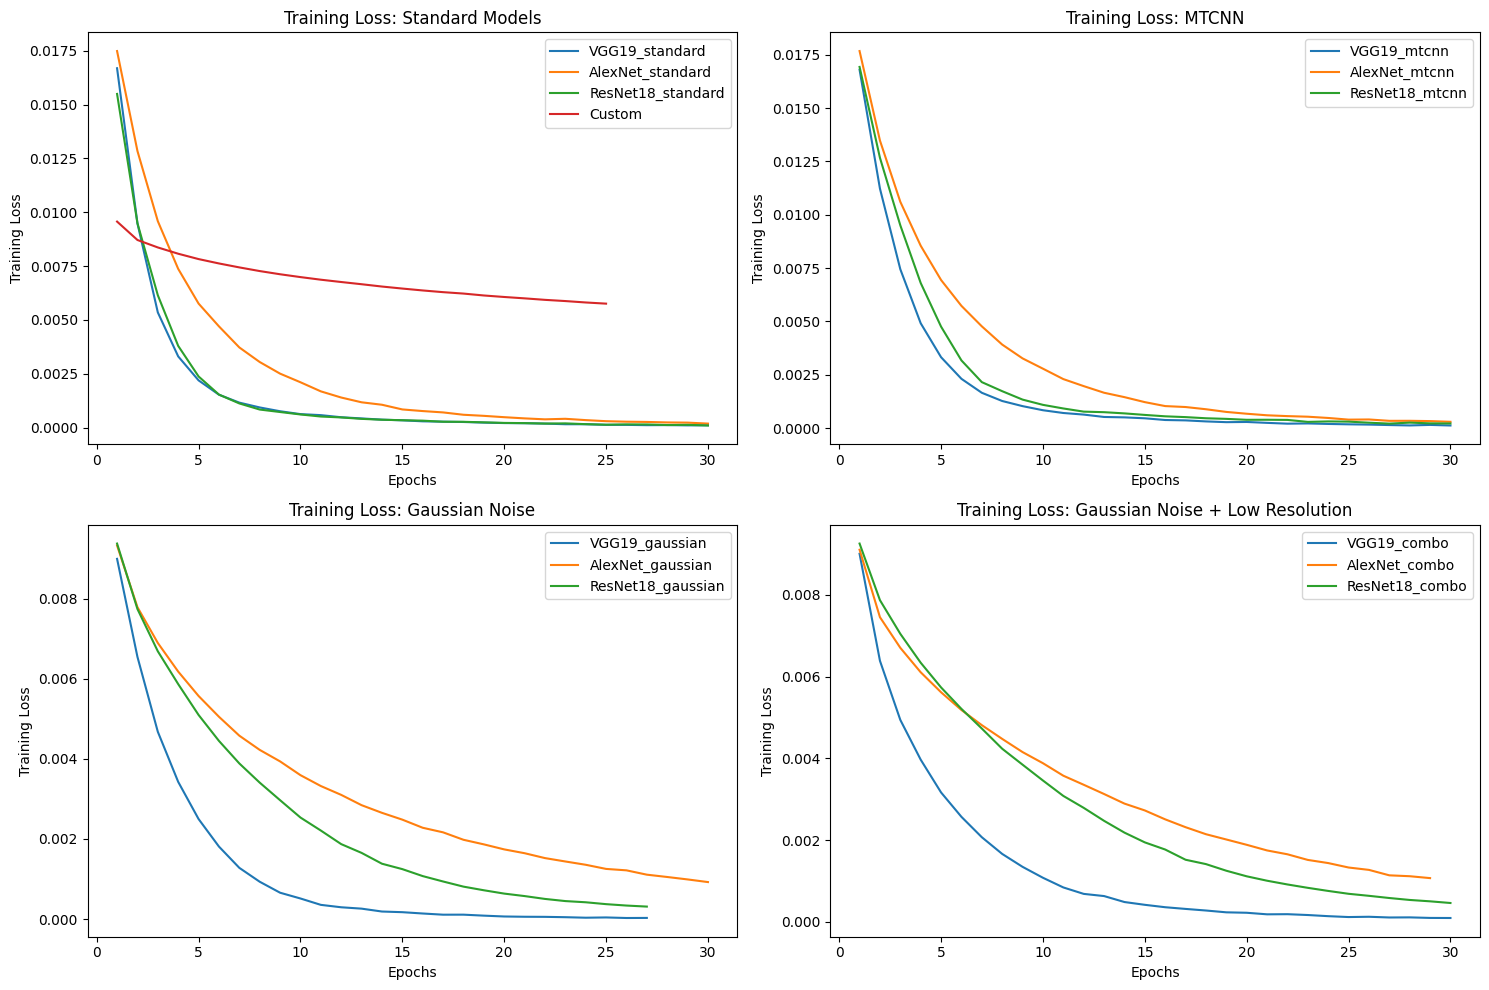

In [22]:
#TRAINING LOSS
import matplotlib.pyplot as plt

def parse_training_loss(line):
    # Extract the part of the line with the data
    data_str = line.split(':', 1)[1].strip()
    # Split the data into pairs (epoch, loss)
    pairs = data_str.strip('[]').split('), (')
    # Convert each pair into a tuple of (int, float)
    parsed_data = []
    for pair in pairs:
        if pair:
            epoch, loss = pair.split(',', 1)
            epoch = int(epoch.strip('() '))
            loss = float(loss.strip('() '))
            parsed_data.append((epoch, loss))
    return parsed_data


file_path = "model_data_output.txt"
# Reading and parsing the file again with the updated function
with open(file_path, 'r') as file:
    lines = file.readlines()

    current_model = ''
    for line in lines:
        if 'Data for' in line:
            current_model = line.split()[2][:-1]
        elif 'Training Loss:' in line:
            graph_data[current_model]['training_loss'] = parse_training_loss(line)

# Plotting again with the updated data
fig, axes = plt.subplots(2, 2, figsize=(15, 10))



# Base models
for model in ['VGG19_standard', 'AlexNet_standard', 'ResNet18_standard', 'Custom']:
    epochs, loss = zip(*graph_data[model]['training_loss'])
    axes[0, 0].plot(epochs, loss, label=model)
axes[0, 0].set_title('Training Loss: Standard Models')
axes[0, 0].set_xlabel('Epochs')
axes[0, 0].set_ylabel('Training Loss')
axes[0, 0].legend()


# MTCNN models
for model in ['VGG19_mtcnn', 'AlexNet_mtcnn', 'ResNet18_mtcnn']:
    epochs, loss = zip(*graph_data[model]['training_loss'])
    axes[0, 1].plot(epochs, loss, label=model)
axes[0, 1].set_title('Training Loss: MTCNN')
axes[0, 1].set_xlabel('Epochs')
axes[0, 1].set_ylabel('Training Loss')
axes[0, 1].legend()

# Gauss model
for model in ['VGG19_gaussian', 'AlexNet_gaussian','ResNet18_gaussian']:
    epochs, loss = zip(*graph_data[model]['training_loss'])
    axes[1, 0].plot(epochs, loss, label=model)
axes[1, 0].set_title('Training Loss: Gaussian Noise')
axes[1, 0].set_xlabel('Epochs')
axes[1, 0].set_ylabel('Training Loss')
axes[1, 0].legend()

# GR models
for model in ['VGG19_combo', 'AlexNet_combo','ResNet18_combo']:
    epochs, loss = zip(*graph_data[model]['training_loss'])
    axes[1, 1].plot(epochs, loss, label=model)
axes[1, 1].set_title('Training Loss: Gaussian Noise + Low Resolution')
axes[1, 1].set_xlabel('Epochs')
axes[1, 1].set_ylabel('Training Loss')
axes[1, 1].legend()

plt.tight_layout()
plt.show()



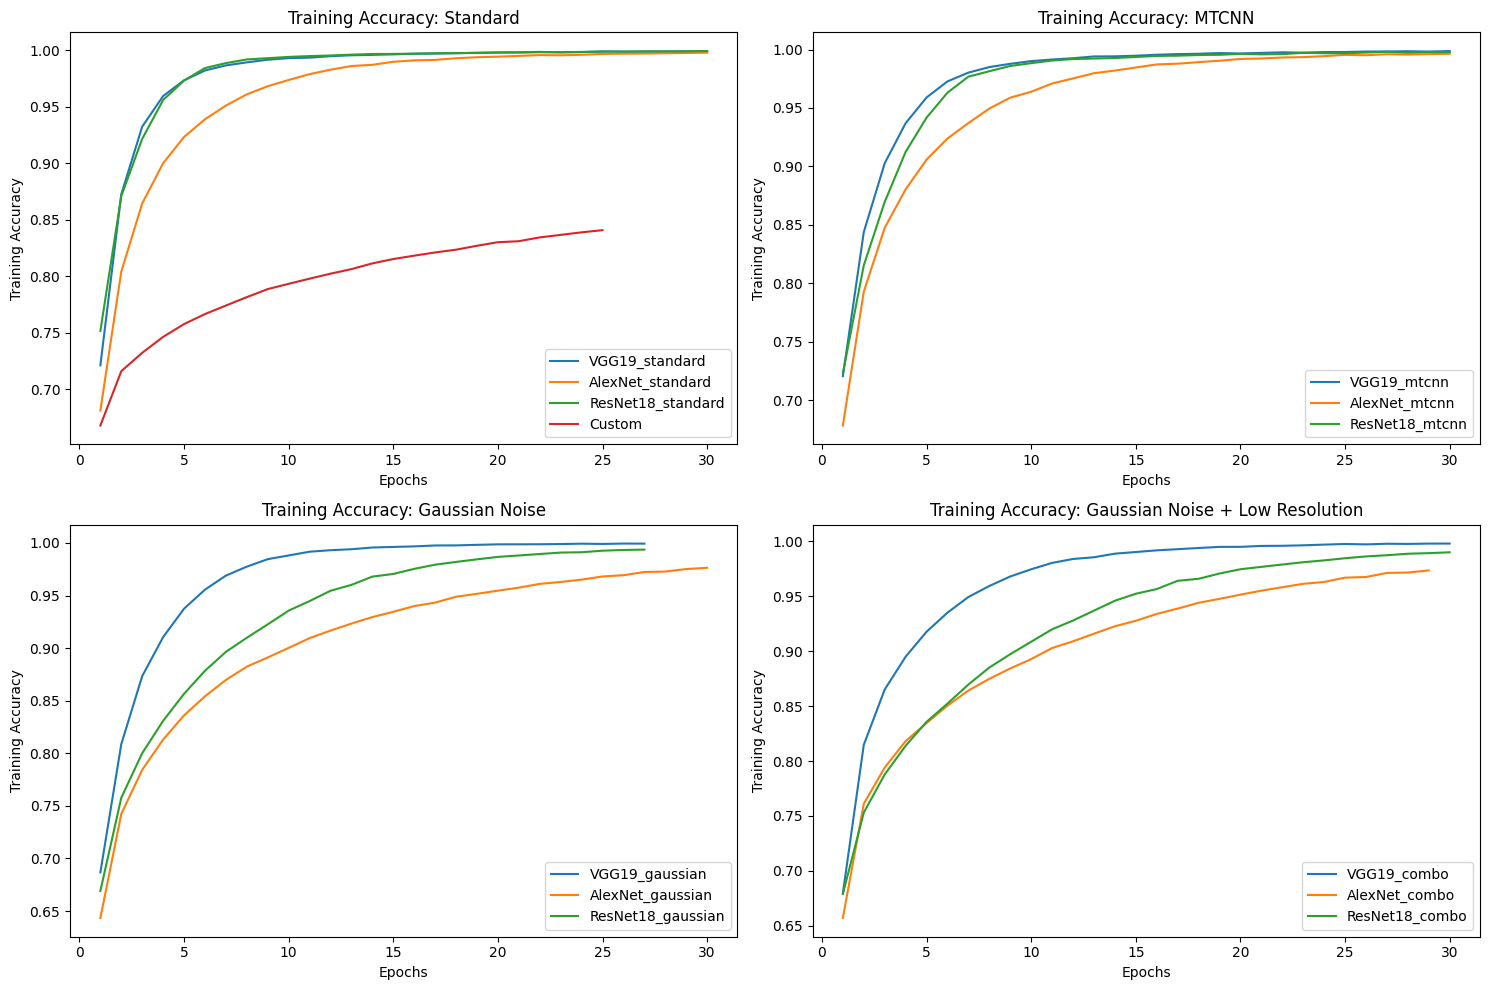

In [18]:
#training accuracy
import matplotlib.pyplot as plt

# Function to parse training accuracy
def parse_training_accuracy(line):
    data_str = line.split(':', 1)[1].strip()
    pairs = data_str.strip('[]').split('), (')
    parsed_data = []
    for pair in pairs:
        if pair:
            epoch, accuracy = pair.split(',', 1)
            epoch = int(epoch.strip('() '))
            accuracy = float(accuracy.strip('() '))
            parsed_data.append((epoch, accuracy))
    return parsed_data


# Read and parse the file
graph_data = {}
with open(file_path, 'r') as file:
    lines = file.readlines()
    current_model = ''
    for line in lines:
        if 'Data for' in line:
            current_model = line.split()[2][:-1]
            graph_data[current_model] = {'training_accuracy': []}
        elif 'Training Accuracy:' in line:
            graph_data[current_model]['training_accuracy'] = parse_training_accuracy(line)

# Plotting validation accuracy for each group of models
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Define model groups
model_groups = {
    'Standard': ['VGG19_standard', 'AlexNet_standard', 'ResNet18_standard', 'Custom'],
    'MTCNN': ['VGG19_mtcnn', 'AlexNet_mtcnn', 'ResNet18_mtcnn'],
    'Gaussian Noise': ['VGG19_gaussian', 'AlexNet_gaussian','ResNet18_gaussian'],
    'Gaussian Noise + Low Resolution': ['VGG19_combo', 'AlexNet_combo','ResNet18_combo']
}

# Iterate over model groups and plot
for i, (group_name, models) in enumerate(model_groups.items()):
    ax = axes[i // 2, i % 2]
    for model in models:
        if model in graph_data and 'training_accuracy' in graph_data[model]:
            epochs, accuracy = zip(*graph_data[model]['training_accuracy'])
            ax.plot(epochs, accuracy, label=model)
    ax.set_title(f'Training Accuracy: {group_name}')
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Training Accuracy')
    ax.legend()

plt.tight_layout()
plt.show()



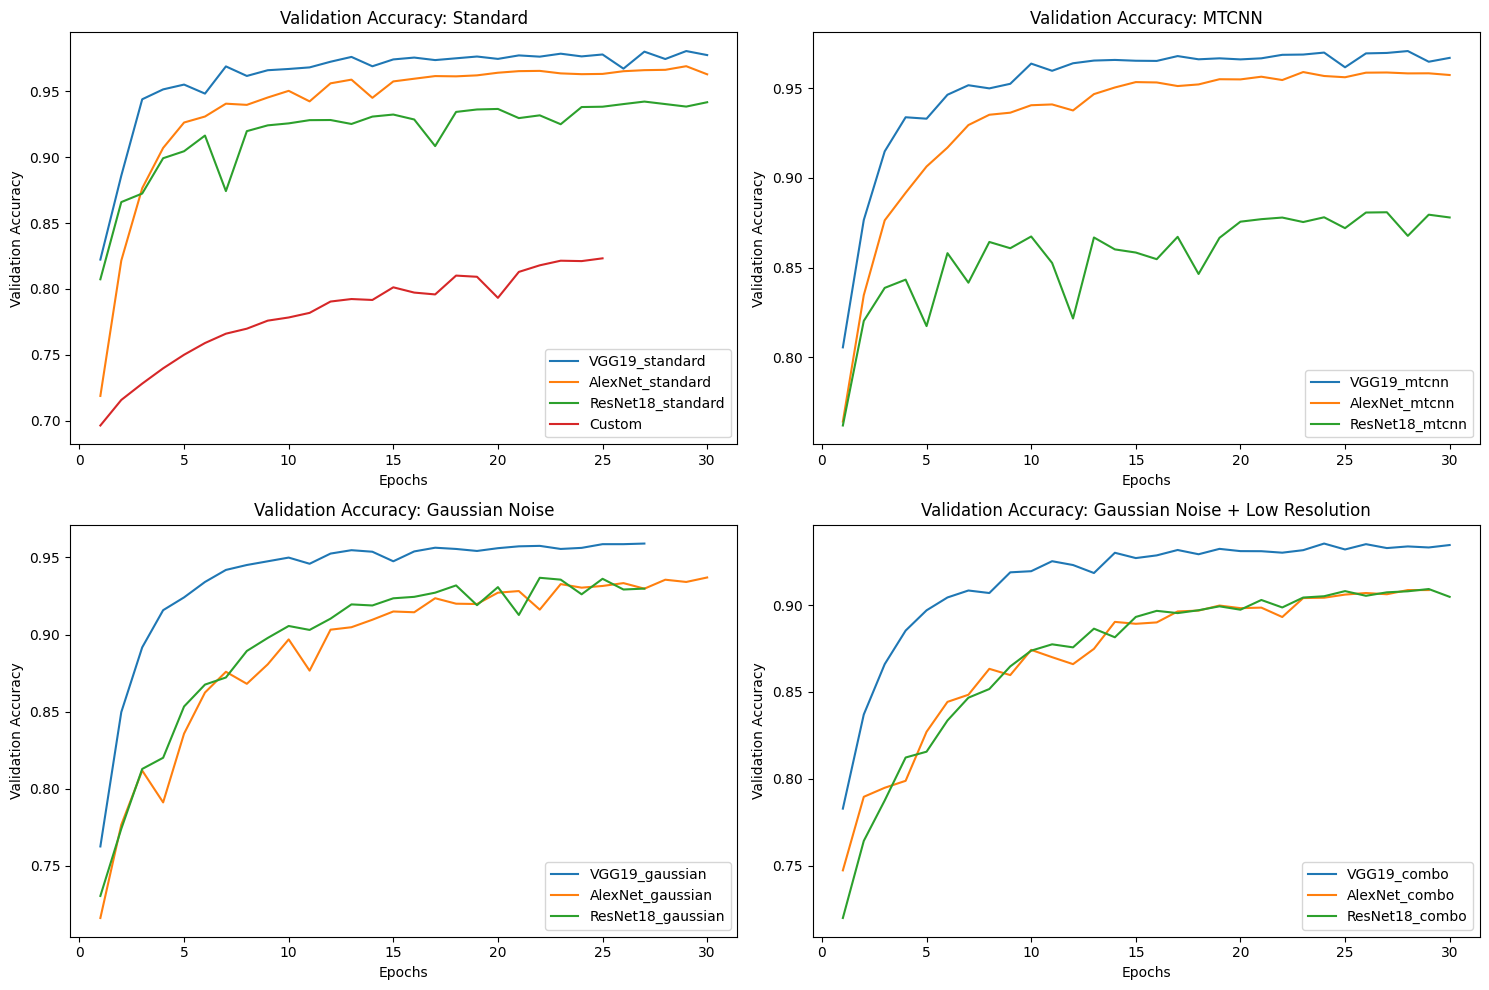

In [26]:
# VALIDATION ACCURACY
import matplotlib.pyplot as plt

# Function to parse validation accuracy
def parse_validation_accuracy(line):
    data_str = line.split(':', 1)[1].strip()
    pairs = data_str.strip('[]').split('), (')
    parsed_data = []
    for pair in pairs:
        if pair:
            epoch, accuracy = pair.split(',', 1)
            epoch = int(epoch.strip('() '))
            accuracy = float(accuracy.strip('() '))
            parsed_data.append((epoch, accuracy))
    return parsed_data


# Read and parse the file
graph_data = {}
with open(file_path, 'r') as file:
    lines = file.readlines()
    current_model = ''
    for line in lines:
        if 'Data for' in line:
            current_model = line.split()[2][:-1]
            graph_data[current_model] = {'validation_accuracy': []}
        elif 'Validation Accuracy:' in line:
            graph_data[current_model]['validation_accuracy'] = parse_validation_accuracy(line)

# Plotting validation accuracy for each group of models
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Define model groups
model_groups = {
    'Standard': ['VGG19_standard', 'AlexNet_standard', 'ResNet18_standard', 'Custom'],
    'MTCNN': ['VGG19_mtcnn', 'AlexNet_mtcnn', 'ResNet18_mtcnn'],
    'Gaussian Noise': ['VGG19_gaussian', 'AlexNet_gaussian','ResNet18_gaussian'],
    'Gaussian Noise + Low Resolution': ['VGG19_combo', 'AlexNet_combo','ResNet18_combo']
}

# Iterate over model groups and plot
for i, (group_name, models) in enumerate(model_groups.items()):
    ax = axes[i // 2, i % 2]
    for model in models:
        if model in graph_data and 'validation_accuracy' in graph_data[model]:
            epochs, accuracy = zip(*graph_data[model]['validation_accuracy'])
            ax.plot(epochs, accuracy, label=model)
    ax.set_title(f'Validation Accuracy: {group_name}')
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Validation Accuracy')
    ax.legend()

plt.tight_layout()


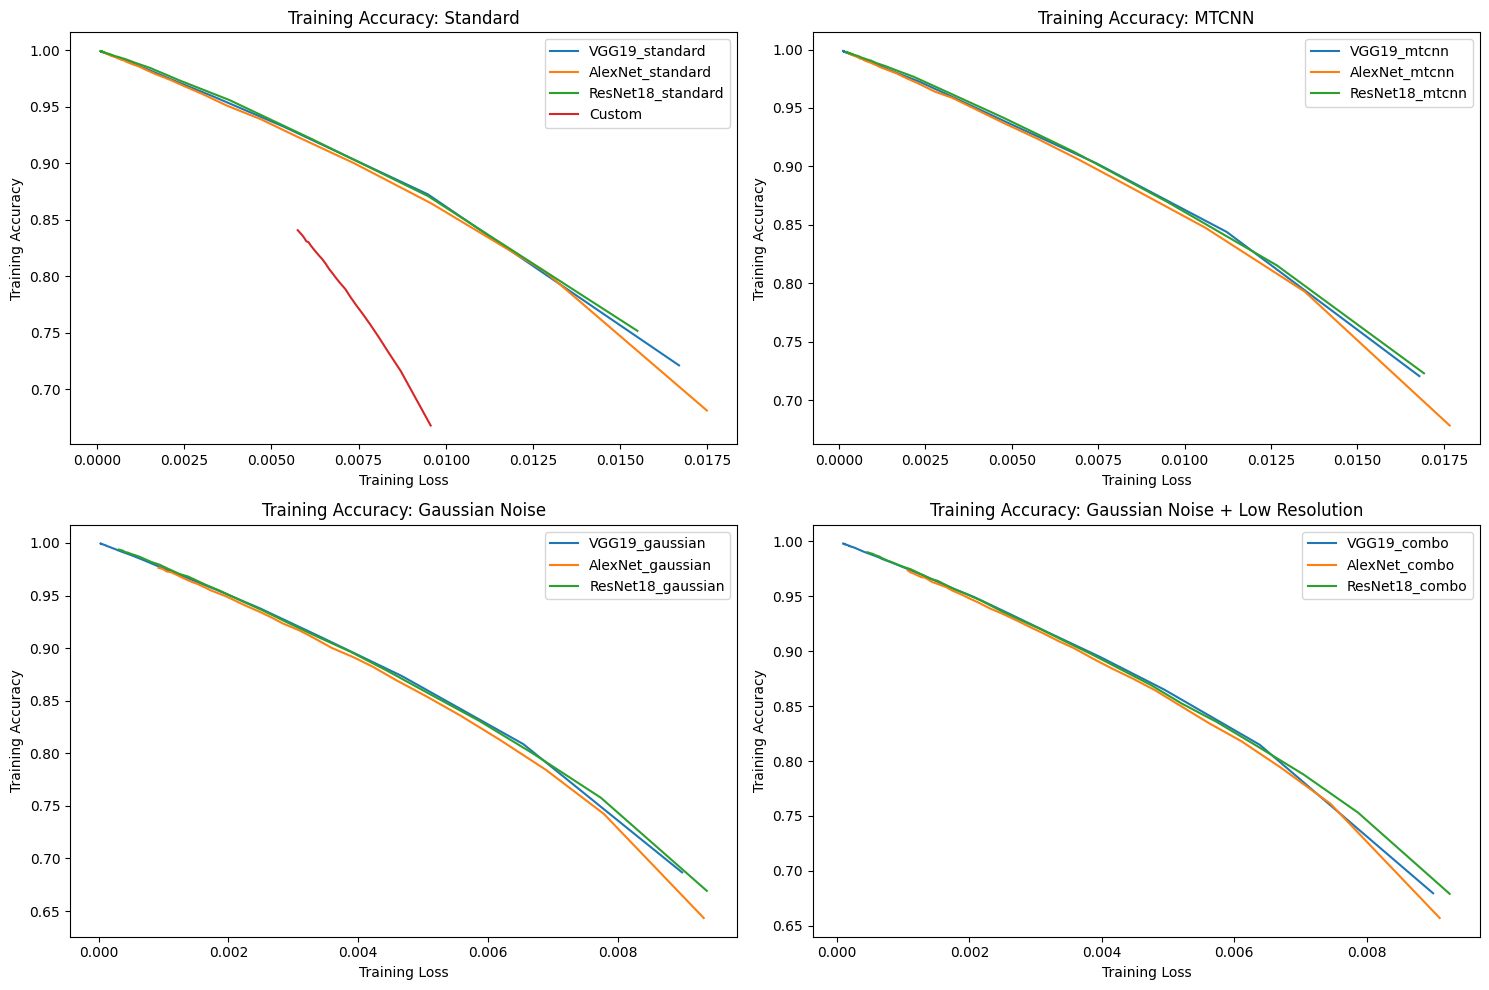

In [38]:
# TRAINING AcCURACY vs training  loss
import matplotlib.pyplot as plt

def parse_training_accuracy(line):
    data_str = line.split(':', 1)[1].strip()
    pairs = data_str.strip('[]').split('), (')
    parsed_data = []
    for pair in pairs:
        if pair:
            epoch, accuracy = pair.split(',', 1)
            epoch = int(epoch.strip('() '))
            accuracy = float(accuracy.strip('() '))
            parsed_data.append((epoch, accuracy))
    return parsed_data


# Function to read and parse the file
def read_and_parse_file(file_path):
    data = {}
    with open(file_path, 'r') as file:
        lines = file.readlines()
        current_model = ''
        for line in lines:
            if 'Data for' in line:
                current_model = line.split()[2][:-1]
                data[current_model] = {'training_loss': [], 'training_accuracy': []}
            elif 'Training Loss:' in line:
                data[current_model]['training_loss'] = parse_training_loss(line)
            elif 'Training Accuracy:' in line:
                data[current_model]['training_accuracy'] = parse_training_accuracy(line)
    return data

# Read and parse the file
graph_data = read_and_parse_file(file_path)

# Plotting validation loss vs validation accuracy
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Define model groups
model_groups = {
    'Standard': ['VGG19_standard', 'AlexNet_standard', 'ResNet18_standard', 'Custom'],
    'MTCNN': ['VGG19_mtcnn', 'AlexNet_mtcnn', 'ResNet18_mtcnn'],
    'Gaussian Noise': ['VGG19_gaussian', 'AlexNet_gaussian','ResNet18_gaussian'],
    'Gaussian Noise + Low Resolution': ['VGG19_combo', 'AlexNet_combo','ResNet18_combo']
}

# Iterate over model groups and plot
for i, (group_name, models) in enumerate(model_groups.items()):
    ax = axes[i // 2, i % 2]
    for model in models:
        if model in graph_data:
            val_loss = [loss for epoch, loss in graph_data[model]['training_loss']]
            val_acc = [acc for epoch, acc in graph_data[model]['training_accuracy']]
            ax.plot(val_loss, val_acc, label=model)
    ax.set_title(f'Training Accuracy: {group_name}')
    ax.set_xlabel('Training Loss')
    ax.set_ylabel('Training Accuracy')
    ax.legend()

plt.tight_layout()
plt.show()
# training loss vs train acc

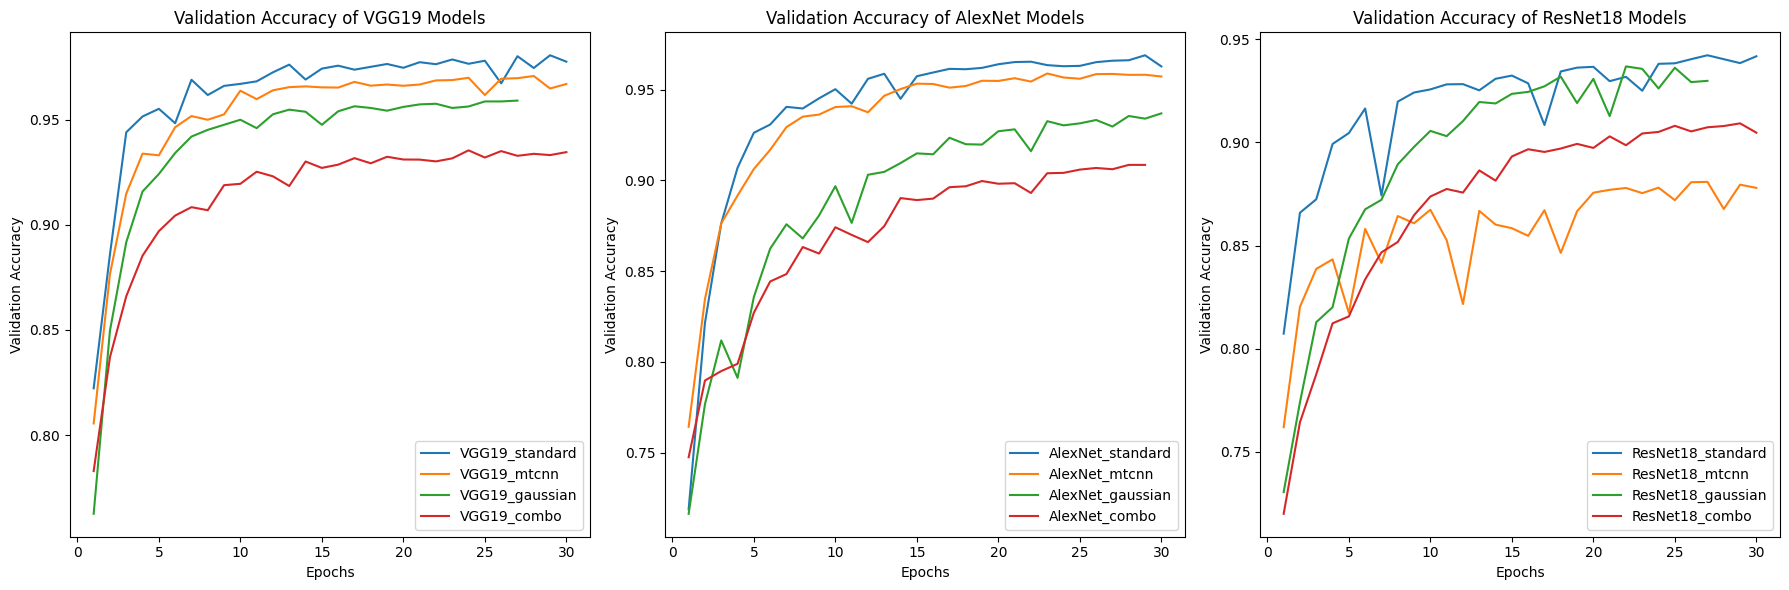

In [24]:
import matplotlib.pyplot as plt
import re

# Function to parse the data from the file
def parse_data(file_content):
    data = {}
    current_model = None
    for line in file_content:
        if line.startswith('Data for'):
            current_model = line.split(':')[0].split(' ')[-1].strip()
            data[current_model] = {'Training Loss': [], 'Training Accuracy': [], 'Validation Loss': [], 'Validation Accuracy': []}
        else:
            if any(key in line for key in ['Training Loss', 'Training Accuracy', 'Validation Loss', 'Validation Accuracy']):
                metric = line.split(':')[0].strip()
                values = re.findall(r'\((\d+), ([0-9\.e\-]+)\)', line)
                data[current_model][metric] = [(int(epoch), float(value)) for epoch, value in values]
    return data

# Function to plot validation accuracy for a specific model type
def plot_validation_accuracy(model_prefix, parsed_data, subplot_index):
    plt.subplot(1, 3, subplot_index)
    for model in parsed_data.keys():
        if model.startswith(model_prefix):
            epochs, accuracy = zip(*parsed_data[model]['Validation Accuracy'])
            plt.plot(epochs, accuracy, label=model)
    plt.title(f'Validation Accuracy of {model_prefix} Models')
    plt.xlabel('Epochs')
    plt.ylabel('Validation Accuracy')
    plt.legend()

# Read the file
file_path = 'model_data_output.txt'
with open(file_path, 'r') as file:
    file_content = file.readlines()

# Parsing the data from the file
parsed_data = parse_data(file_content)

# Creating the plots
plt.figure(figsize=(18, 6))

# Plotting each model type
plot_validation_accuracy('VGG19', parsed_data, 1)
plot_validation_accuracy('AlexNet', parsed_data, 2)
plot_validation_accuracy('ResNet18', parsed_data, 3)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

